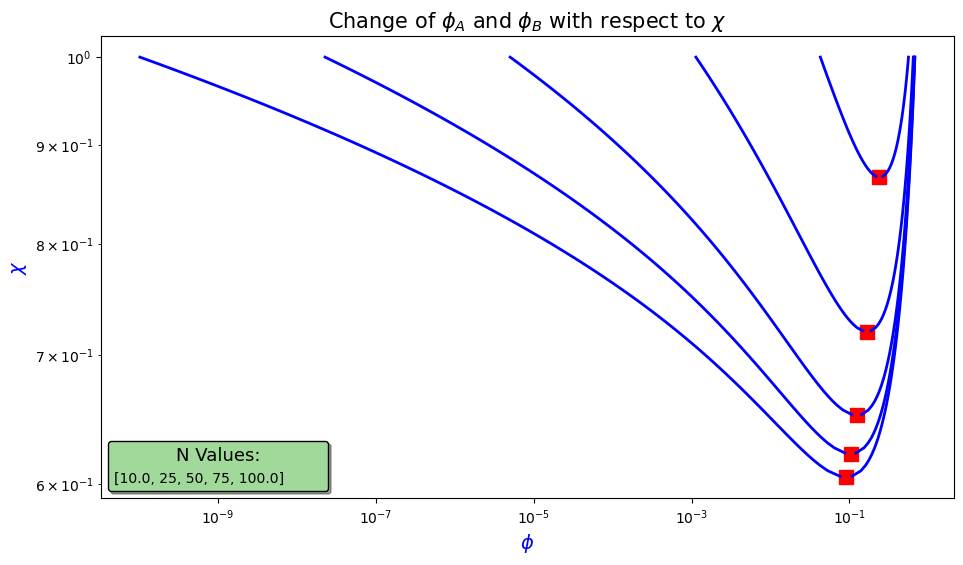

In [1]:
import numpy as np
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt

def phi_spinA(chi, N):
    phispinA = (1 + (-1 + 2 * chi) * N + np.sqrt(1 - 2 * (1 + 2 * chi) * N + (1 - 2 * chi)**2 * N**2)) / (4 * chi * N) 
    return phispinA

def phi_spinB(chi, N):
    phispinB = (1 + (-1 + 2 * chi) * N - np.sqrt(1 - 2 * (1 + 2 * chi) * N + (1 - 2 * chi)**2 * N**2)) / (4 * chi * N)
    return phispinB

def mu_calc(phi, chi, N):
    term1 = -1 + (1 / N) + chi
    term2 = (1 / N) * np.log(phi) - np.log(1 - phi)
    term3 = 2 * chi * phi    
    result = term1 + term2 - term3
    return result
    
def pi_calc(phi, chi, N):
    if phi <= 0 or phi >= 1:
        raise ValueError("phi must be between 0 and 1 (exclusive)", phi)
    result = -np.log(1 - phi) - chi * phi**2 + phi * (1/N -1)
    return result

def my_func(vars, paras):
    xA , xB = vars
    chi , N = paras
    phiSA = phi_spinA(chi, N)
    phiSB = phi_spinB(chi, N)
    phiA = phiSA + ((1 - phiSA) * np.exp(xA))/(1 + np.exp(xA)) #-1e-12
    phiB = phiSB * ((np.exp(xB))/(1 + np.exp(xB)))# +1e-20
    return (
        (mu_calc(phiA, chi, N) - mu_calc(phiB, chi, N)),
        (pi_calc(phiA, chi, N) - pi_calc(phiB, chi, N))
    )


# Initialize the plot
plt.figure(figsize=(11, 6))

# Set N values
N_values = [10.0, 25, 50, 75, 100.0] 


for N in N_values:
    # Define the range for chi and fix N
    phiC = 1 / (1 + np.sqrt(N))
    chiC = 0.5 * (1 + (1/np.sqrt(N)))**2
    chi_values = np.linspace((chiC * 1.001), 1, 100)

    #Create guess
    phiAg=phiC+np.sqrt(3*(chi_values[0]-chiC)/(2*chiC**2*np.sqrt(N)))
    phiBg=phiC-np.sqrt(3*(chi_values[0]-chiC)/(2*chiC**2*np.sqrt(N)))
    phiSA = phi_spinA(chi_values[0], N)
    phiSB = phi_spinB(chi_values[0], N)
    
    #Convert to xA and xB guesses
    xAguess=-np.log((1-phiSA)/(phiAg-phiSA)-1)
    xBguess=-np.log(phiSB/phiBg-1)
    
    # Initial guess
    initial_guess = [xAguess, xBguess]
    
    # Lists to store solutions
    phiA_solutions = []
    phiB_solutions = []

    
    for chi in chi_values:
        paras = [chi, N]
        solution = root(my_func, initial_guess, args=(paras,)) 
        xA, xB = np.real(solution.x)
        #xA, xB = solution
        phiSA = phi_spinA(chi, N)
        phiSB = phi_spinB(chi, N)
        phiA = phiSA + ((1 - phiSA) * ((np.exp(xA))/(1 + np.exp(xA)))) #-1e-12
        phiB = phiSB * ((np.exp(xB))/(1 + np.exp(xB))) # +1e-20
        phiA_solutions.append(phiA)
        phiB_solutions.append(phiB)
        initial_guess = solution.x

    # Plotting
    plt.plot(phiA_solutions, chi_values, color='blue', linestyle='-', linewidth=2)
    plt.plot(phiB_solutions, chi_values, color='blue', linestyle='-', linewidth=2)
    plt.scatter(phiC, chiC, color='red', s=100, marker='s')


# Adding labels and title
plt.xlabel(r'$\phi$', fontsize=14, color='blue')
plt.ylabel(r'$\chi$', fontsize=14, color='blue')
plt.title(r'Change of $\phi_A$ and $\phi_B$ with respect to $\chi$', fontsize=15)
plt.scatter([], [], color='none', label=f'{N_values}')
plt.xscale('log')
plt.yscale('log')

# Adding a legend
plt.legend(title='N Values:', title_fontsize='13', fontsize='10', loc='lower left', frameon=True, shadow=True, framealpha=1, edgecolor='black', facecolor='#a1d99b', markerfirst=False)
plt.grid(False)

# Display the plot
plt.show()
    
    #print(phiC, chiC)

In [214]:
N = 10
chi = (0.5 * (1 + (1/np.sqrt(N)))**2) * 1.01
initial_guess = [0.5, 0.55]
paras = [chi, N]
solution = fsolve(my_func, initial_guess, args=(paras,))
print(solution)

xA, xB = solution
chi, N = paras
phiSA = phi_spinA(chi, N)
phiSB = phi_spinB(chi, N)
phiA = phiSA + ((1 - phiSA) * np.exp(xA))/(1 + np.exp(xA))
phiB = phiSB * ((np.exp(xB))/(1 + np.exp(xB)))
print(phiA, phiB)

[-2.69047653 67.52997855]
0.3308173302605906 0.2002354271373444
